In [17]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics  # Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

thyroid = pd.read_csv("Thyroid_Diff.csv")

cols_to_encode = [
    'Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function',
    'Physical Examination','Adenopathy','Pathology','Focality','Risk',
    'Stage','Response','Recurred'
]

for col in cols_to_encode:
    encoder = LabelEncoder()
    thyroid[col] = encoder.fit_transform(thyroid[col])

thyroid.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,T1a,N0,M0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,T1a,N0,M0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,T1a,N0,M0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,T1a,N0,M0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,T1a,N0,M0,0,1,0


In [12]:
# Define features (X) and target (y)
# Select appropriate feature columns from the dataset
feature_cols = [
    'Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 
    'Thyroid Function', 'Physical Examination', 'Adenopathy', 
    'Pathology', 'Focality', 'Risk', 'Stage', 'Response'
]

X = thyroid[feature_cols]  # Features
y = thyroid['Recurred']    # Target variable


In [13]:
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# Check the shapes of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (268, 13)
Testing set shape: (115, 13)


In [14]:
# Create a Decision Tree Classifier object using entropy (information gain) as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf = clf.fit(X_train, y_train)

In [15]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Display some predictions alongside actual values
print("Testing (first few rows):")
print(X_test.head())
print("Predicted:", y_pred[:5])
print("Actual:   ", y_test.iloc[:5].values)

# Calculate and print model accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Testing (first few rows):
     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
189   42       0        0           0                0                 2   
381   61       1        1           1                1                 0   
120   37       0        0           0                0                 2   
207   17       0        0           0                0                 2   
321   62       0        0           0                0                 2   

     Physical Examination  Adenopathy  Pathology  Focality  Risk  Stage  \
189                     1           3          3         1     2      0   
381                     1           1          1         0     0      3   
120                     4           3          3         1     2      0   
207                     1           5          3         1     1      0   
321                     1           5          3         0     1      1   

     Response  
189         1  
381         3  
120         1  
20

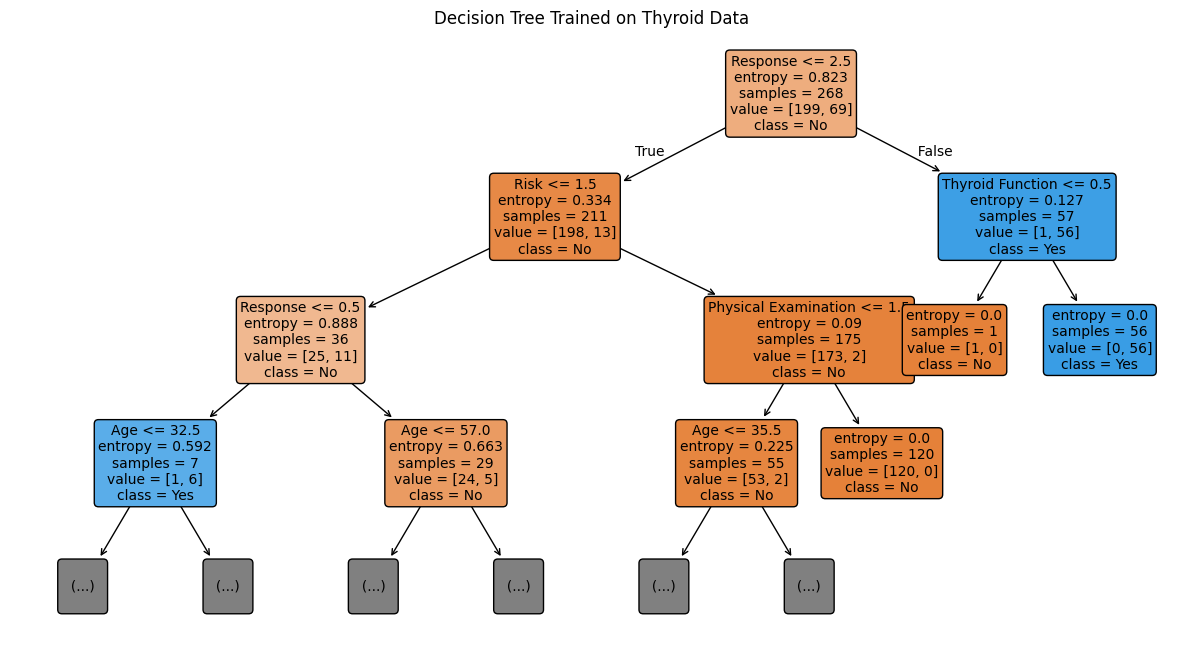

In [18]:
# Visualize the decision tree
plt.figure(figsize=(15, 8))
tree.plot_tree(
    clf, 
    filled=True, 
    rounded=True, 
    max_depth=3, 
    fontsize=10, 
    feature_names=feature_cols, 
    class_names=['No', 'Yes']  # Assuming 0 = No, 1 = Yes
)
plt.title("Decision Tree Trained on Thyroid Data")
plt.show()

In [19]:
print("Enter the following details for a new patient:")
# Prompt user for input
age = int(input("Age: "))
gender = int(input("Gender (0 for Female, 1 for Male): "))
smoking = int(input("Smoking (0 for No, 1 for Yes): "))
hx_smoking = int(input("History of Smoking (0 for No, 1 for Yes): "))
hx_radiothreapy = int(input("History of Radiotherapy (0 for No, 1 for Yes): "))
thyroid_function = int(input("Thyroid Function (0 = Euthyroid, 1 = Clinical Hypothyroidism, 2 = Clinical Hyperthyroidism): "))
physical_examination = int(input("Physical Examination (0 = Single nodular goiter-left, 1 = Single nodular goiter-right, 2 = Multinodular goiter): "))
adenopathy = int(input("Adenopathy (0 for No, 1 for Yes): "))
pathology = int(input("Pathology (0 = Micropapillary, 1 = Other): "))
focality = int(input("Focality (0 = Uni-Focal, 1 = Multi-Focal): "))
risk = int(input("Risk (0 = Low, 1 = High): "))
stage = int(input("Stage (0 = I, 1 = II, 2 = III, 3 = IV): "))
response = int(input("Response (0 = Excellent, 1 = Indeterminate, 2 = Biochemical incomplete, 3 = Structural incomplete): "))

# Construct the input data row
new_patient = [[
    age, gender, smoking, hx_smoking, hx_radiothreapy, 
    thyroid_function, physical_examination, adenopathy, 
    pathology, focality, risk, stage, response
]]

# Use the trained classifier to predict
prediction = clf.predict(new_patient)
    
# Display the result
if prediction[0] == 1:
    print("Model predicts: Thyroid cancer **will recur**.")
else:
    print("Model predicts: Thyroid cancer **will not recur**.")



Enter the following details for a new patient:
Model predicts: Thyroid cancer **will recur**.


C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
